In [169]:
import qiskit.quantum_info
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import random_statevector
import qiskit
from problem import qrc


In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a NumPy array with shape (n_samples, 8)
import numpy as np
from scipy.stats import unitary_group

data = []
for i in range(5000):
    x = unitary_group.rvs(2)
    data.append(x)
data = np.array(data)

In [171]:
data1 = []
for i in range(5000):
    x = qiskit.quantum_info.DensityMatrix(qrc.qrc_Qiskit(1, np.random.randint(10))).data
    data1.append(x)
data1 = np.array(data1)



In [172]:
def plot_bloch_sphere(ax, bloch_vectors):
    """ Helper function to plot vectors on a sphere."""
    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30, 45)
    ax.dist = 7

    # Draw the axes (source: https://github.com/matplotlib/matplotlib/issues/13575)
    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)

    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)
    ax.text(1.9, 0, 0, r"|+⟩", color="black", fontsize=16)
    ax.text(-1.7, 0, 0, r"|–⟩", color="black", fontsize=16)
    ax.text(0, 1.7, 0, r"|i+⟩", color="black", fontsize=16)
    ax.text(0,-1.9, 0, r"|i–⟩", color="black", fontsize=16)
    count_x, count_y, count_z = 0, 0, 0
    for vector in bloch_vectors:
        if vector[0] < 10**(-10):
            count_x += 1
        if vector[1] <10**(-10):
            count_y += 1
        if vector[2] <10**(-10):
            count_z += 1
    print(count_x, count_y, count_z)
    ax.scatter(
        bloch_vectors[:,0], bloch_vectors[:,1], bloch_vectors[:, 2], c='#e29d9e', alpha=0.3
    )

    
def convert_to_bloch_vector(rho):
    """Convert a density matrix to a Bloch vector."""

    X = np.array([[0, 1], [1, 0]])
    Y = np.array([[0, -1j], [1j, 0]])
    Z = np.array([[1, 0], [0, -1]])
    ax = np.trace(np.dot(rho, X)).real
    ay = np.trace(np.dot(rho, Y)).real
    az = np.trace(np.dot(rho, Z)).real    
    return [ax, ay, az]


2541 2532 2508
3017 3283 2421


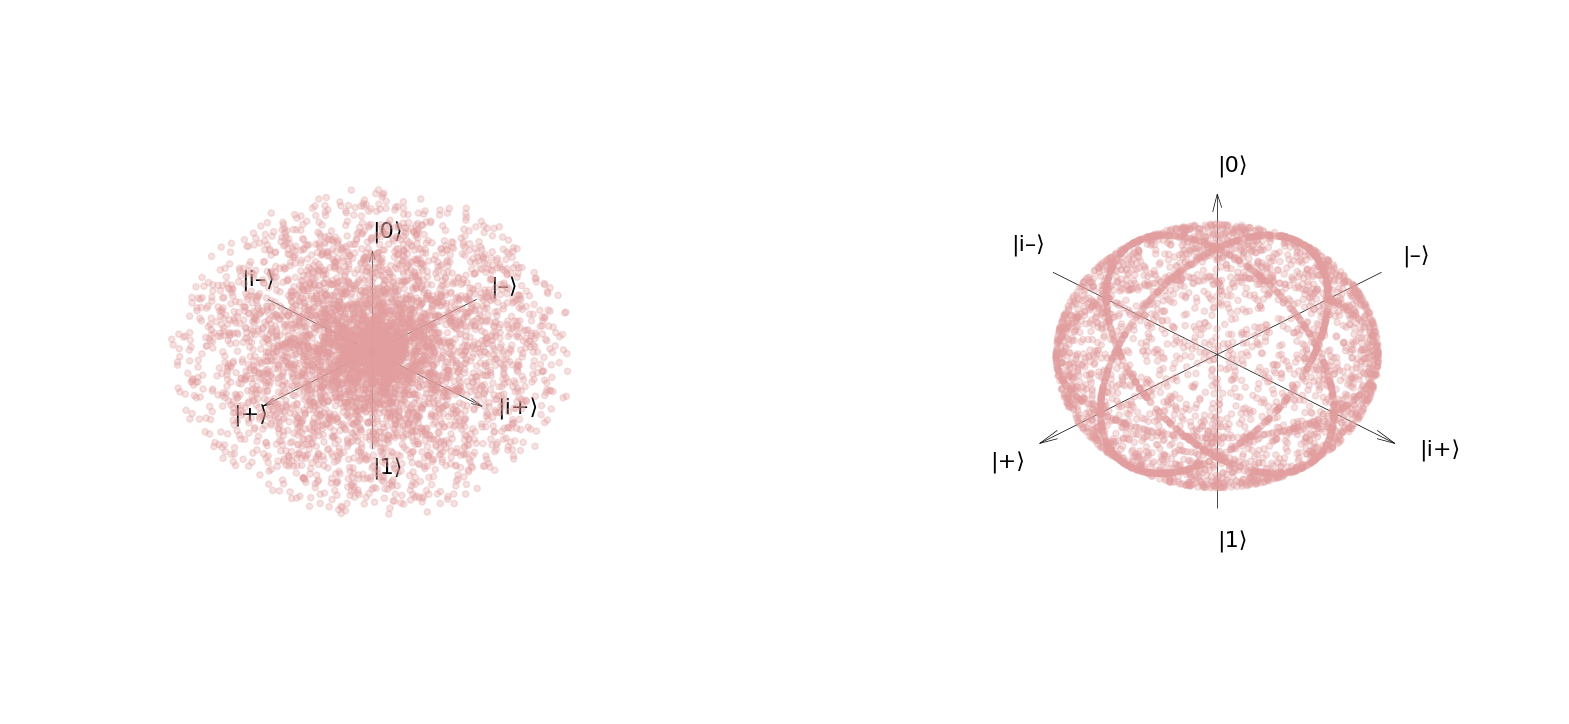

In [173]:
# Create a figure object
fig = plt.figure(figsize=(20,10))

# Create 4x2 subplots
axes = []
for i in range(1, 3):
    ax = fig.add_subplot(1, 2, i, projection='3d')
    axes.append(ax)
plot_bloch_sphere(axes[0], np.array([convert_to_bloch_vector(rho) for rho in data]))
plot_bloch_sphere(axes[1], np.array([convert_to_bloch_vector(rho) for rho in data1]))
plt.savefig('bloch.svg')